In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import random

In [2]:
training_challenge_dict = json.load(open('../data/RAW_DATA_DIR/arc-prize-2024/arc-agi_training_challenges.json'))
training_solutions_dict = json.load(open('../data/RAW_DATA_DIR/arc-prize-2024/arc-agi_training_solutions.json'))

In [3]:
# find random keys from the training_challenge_dict
random_keys = list(training_challenge_dict.keys())
n = random.randint(0, len(random_keys))

In [4]:
#NOTE: This is our reward function

def maximum_overlap_regions(array1, array2):
        """
        Vectorized calculation of maximum overlap between two 2D arrays.
        """
        shape1 = array1.shape
        shape2 = array2.shape
        
        # Calculate possible positions for sliding array2 over array1
        offsets_i = np.arange(-shape2[0] + 1, shape1[0])
        offsets_j = np.arange(-shape2[1] + 1, shape1[1])
        
        # Create grids for all possible offsets
        grid_i, grid_j = np.meshgrid(offsets_i, offsets_j, indexing='ij')
        
        # Calculate the valid overlap regions for each position
        row_start1 = np.maximum(0, grid_i)
        row_end1 = np.minimum(shape1[0], grid_i + shape2[0])
        col_start1 = np.maximum(0, grid_j)
        col_end1 = np.minimum(shape1[1], grid_j + shape2[1])
        
        row_start2 = np.maximum(0, -grid_i)
        row_end2 = row_start2 + (row_end1 - row_start1)
        col_start2 = np.maximum(0, -grid_j)
        col_end2 = col_start2 + (col_end1 - col_start1)
        
        # Calculate overlap scores for all positions
        max_overlap_score = 0
        best_overlap1 = None
        best_overlap2 = None
        
        for idx in np.ndindex(grid_i.shape):
            r1s, r1e = row_start1[idx], row_end1[idx]
            c1s, c1e = col_start1[idx], col_end1[idx]
            r2s, r2e = row_start2[idx], row_end2[idx]
            c2s, c2e = col_start2[idx], col_end2[idx]
            
            region1 = array1[r1s:r1e, c1s:c1e]
            region2 = array2[r2s:r2e, c2s:c2e]
            
            overlap_score = np.sum(region1 == region2)
            
            if overlap_score > max_overlap_score:
                max_overlap_score = overlap_score
                best_overlap1 = (slice(r1s, r1e), slice(c1s, c1e))
                best_overlap2 = (slice(r2s, r2e), slice(c2s, c2e))
        
        return best_overlap1, best_overlap2

array1 = np.random.randint(0, 9, (30, 30))

array2 = np.array([[1, 2, 0],
                  [5, 6, 0],
                  [9, 0, 0],
                  [0, 0, 0]])

overlap1, overlap2 = maximum_overlap_regions(array1, array2)
print(array1[overlap1])
print(array2[overlap2])
print(array1[overlap1] == array2[overlap2])
print(np.sum(array1[overlap1] == array2[overlap2]))


[[0 4 0]
 [1 6 0]
 [0 0 7]
 [0 7 5]]
[[1 2 0]
 [5 6 0]
 [9 0 0]
 [0 0 0]]
[[False False  True]
 [False  True  True]
 [False  True False]
 [ True False False]]
5


## Difficult problems
- a64e4611
- cbded52d
- 508bd3b6


# Test Selections and Transformations

Challenge key: 4258a5f9


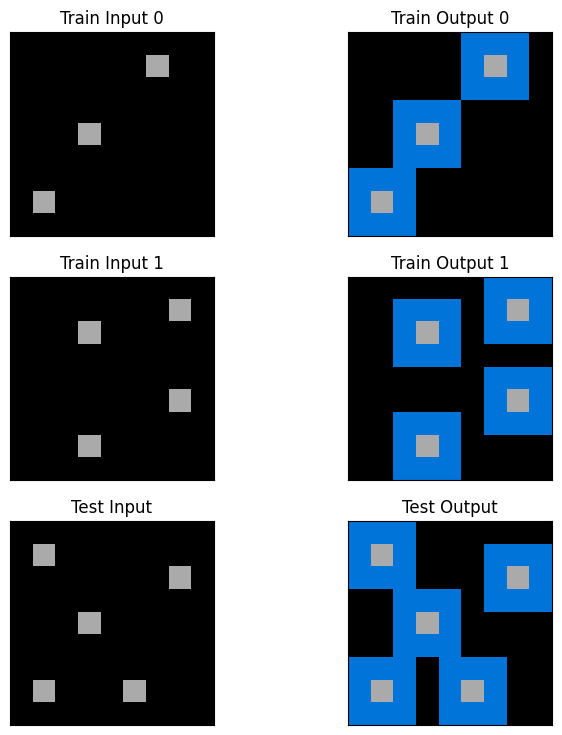

In [5]:
# import the display_challenge function
from dsl.utilities.plot import display_challenge, plot_grid

# find the first challenge and solution
challenge_key = '1f85a75f'
challenge_key = random_keys[n]
first_challenge = training_challenge_dict[challenge_key]
first_solution = training_solutions_dict[challenge_key]

print(f'Challenge key: {challenge_key}')

# display the challenge
display_challenge(challenge_key)

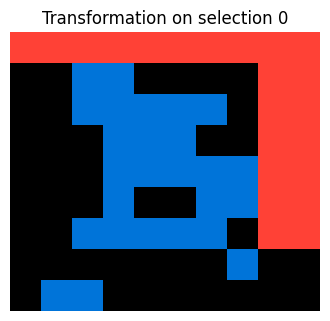

In [6]:
from dsl.utilities.plot import plot_grid 
arr = np.array([
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 1, 1, 0, 0, 0, 0, 2, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 0, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 1, 1, 2, 2],
       [0, 0, 0, 1, 0, 0, 1, 1, 2, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

# plot the array as an image
plot_grid(arr)

In [7]:
from dsl.color_select import ColorSelector

colsel = ColorSelector()

popular_color = colsel.mostcolor(arr)
print(f'Most popular color: {popular_color}')
least_popular_color = colsel.leastcolor(arr)
print(f'Least popular color: {least_popular_color}')

second_most_popular_color = colsel.rankcolor(arr, 1)
print(f'Second most popular color: {second_most_popular_color}')

color_of_second_biggest_shape = colsel.rank_largest_shape_color_nodiag(arr, 1)
print(f'Color of second biggest shape: {color_of_second_biggest_shape}')

color_of_second_biggest_shape = colsel.rank_largest_shape_color_diag(arr, 1)
print(f'Color of second biggest shape: {color_of_second_biggest_shape}')

Most popular color: 0
Least popular color: 2
Second most popular color: 1
Color of second biggest shape: 1
Color of second biggest shape: 1


Selecting by color


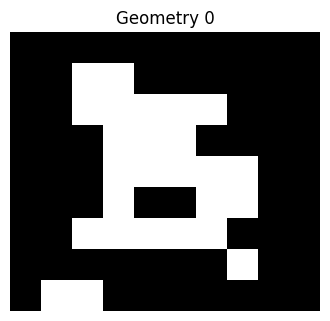

Selecting colored rectange combinations


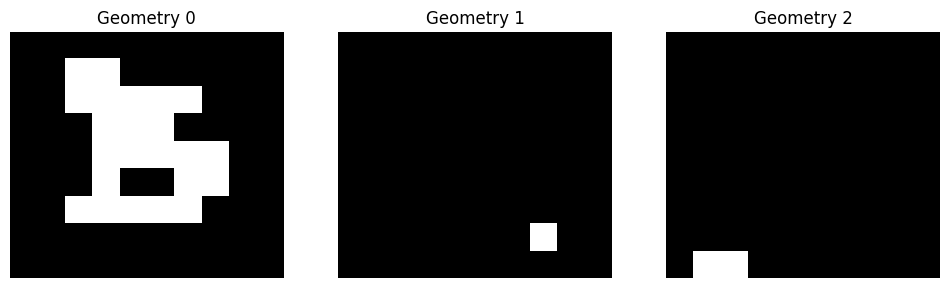

Selecting cells adjacent to color


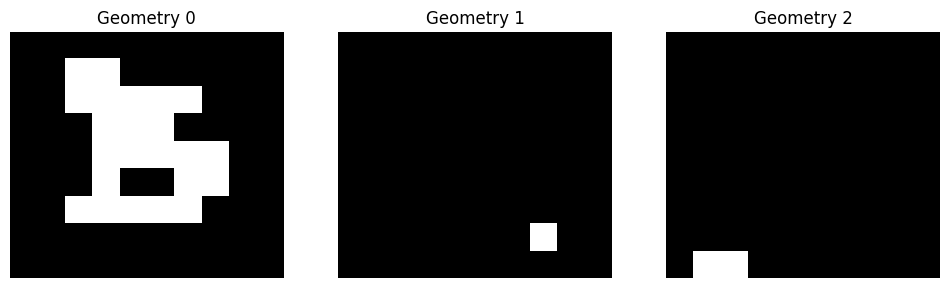

In [8]:
from dsl.select import Selector
from dsl.utilities.plot import plot_selection
from skimage.segmentation import find_boundaries

sel = Selector()

print('Selecting by color')
selection = sel.select_color(arr, 1)
plot_selection(selection)

print('Selecting colored rectange combinations')
selection3 = sel.select_connected_shapes(arr, 1)
plot_selection(selection3)

print('Selecting cells adjacent to color')
selection4 = sel.select_connected_shapes(arr, 1)
plot_selection(selection4)

# Test Reinforcement learning loop

In [9]:
from action_space import ARCActionSpace
from dsl.transform import Transformer
from dsl.utilities.plot import plot_grid_3d
trn = Transformer()

action_space = ARCActionSpace(colsel, sel, trn)
print(len(action_space))

25956


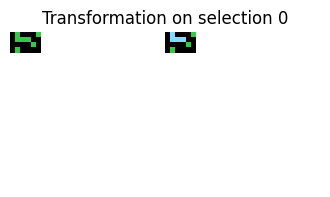

Action:  [ 55  89 772]
Action in words:
color_selection: rank_largest_shape_color_nodiag, rank=1
selection: select_adjacent_to_color_diag, points_of_contact=7
transformation: gravitate_whole_right_paste, 


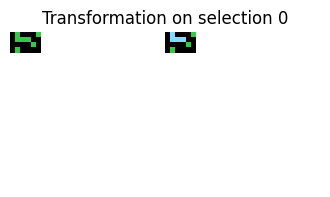

Reward:  -1.0 Done:  False


Action:  [ 9 73 46]
Action in words:
color_selection: rankcolor, rank=2
selection: select_adjacent_to_color_diag, points_of_contact=2
transformation: color, method=shape_rank_diag, param=9


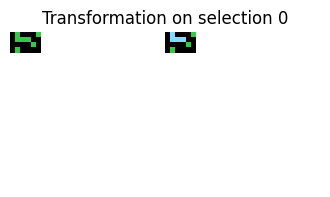

Reward:  -1.0 Done:  False


Action:  [ 77  28 914]
Action in words:
color_selection: rank_largest_shape_color_diag, rank=0
selection: select_outer_border, 
transformation: vupscale, scale_factor=2



Debugging starts here:
 --- modulename: transform, funcname: vupscale
transform.py(1225):         selection_3d_grid = create_grid3d(grid, selection)
 --- modulename: transformation_utilities, funcname: create_grid3d
transformation_utilities.py(12):         if len(grid.shape) == 3:
transformation_utilities.py(14):         num_selections = selection.shape[0]
transformation_utilities.py(15):         grid_3d = np.stack([grid] * num_selections, axis=0)
 --- modulename: shape_base, funcname: _stack_dispatcher
shape_base.py(369):     arrays = _arrays_for_stack_dispatcher(arrays)
 --- modulename: shape_base, funcname: _arrays_for_stack_dispatcher
shape_base.py(210):     if not hasattr(arrays, "__getitem__"):
shape_base.py(214):     return tuple(arrays)
shape_base.py(370):     if out is not None:


/Users/francescobraicovich/Documents/Python/Personale/ARC/arcenv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/francescobraicovich/Documents/Python/Personale/ARC/arcenv/lib/python3.11/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


AssertionError: The following transformation failed: vupscale, scale_factor=2

In [10]:
from enviroment import ARC_Env

env = ARC_Env(training_challenge_dict, action_space=action_space)
env.reset(seed=None)
plot_grid_3d(env.state)
for i in range(30):
    action = random.choice(action_space.space)
    print('Action: ', action)
    print('Action in words:')
    for key, value in action_space.action_to_string(action).items():
        print(f'{key}: {value}')
    state, reward, done, info = env.step(action)
    plot_grid_3d(state)
    print('Reward: ', reward, 'Done: ', done)
    print()
    print('')

In [ ]:
action = np.array([77, 7, 370])
action_space.action_to_string(action)

{'color_selection': 'rank_largest_shape_color_diag, rank=0',
 'selection': 'select_color, ',
 'transformation': 'mirror_vertically, '}

In [ ]:
import numpy as np

def enlarge(grid, selection, radius):
    """
    Enlarges the selected shape in the grid by a given radius, adding rows and columns of zeros between existing rows and columns.
    
    Args:
        grid (np.ndarray): The original input grid
        selection (np.ndarray): A binary mask indicating the shape (same shape as grid)
        radius (int): Number of cells to expand outward
        
    Returns:
        np.ndarray: A new grid with the enlarged shape
    #TODO: In the DRL environment radius will probably have to be an iterable for low numbers (likely between 1 and 3)
    """
    # Ensure grid and selection are the same shape
    assert grid.shape == selection.shape, "Grid and each selection layer must have the same shape."
    
    rows, cols = grid.shape
    # Create a larger grid with interstitial spaces
    new_rows = rows * 2 - 1
    new_cols = cols * 2 - 1
    
    # Add padding for the expansion
    pad_rows = radius
    pad_cols = radius
    total_rows = new_rows + 2 * pad_rows
    total_cols = new_cols + 2 * pad_cols
    
    # Create padded grid with zeros
    padded_grid = np.zeros((total_rows, total_cols), dtype=grid.dtype)
    padded_selection = np.zeros((total_rows, total_cols), dtype=selection.dtype)
    
    
    # Fill original positions (accounting for padding offset)
    for i in range(rows):
        for j in range(cols):
            if selection[i, j] == 1 and grid[i, j] == 1:
                padded_grid[pad_rows + i*2, pad_cols + j*2] = 1
                padded_selection[pad_rows + i*2, pad_cols + j*2] = 1
    
    # Find all non-zero elements in the grid (enlargement origins)
    enlargement_origins = np.argwhere(padded_grid != 0)

    # Iterate over each origin
    for origin in enlargement_origins:
        row, col = origin

        # Vertical (upwards)
        for r in range(1, radius + 1):
            if row - r >= 0:  # Ensure we don't go out of bounds
                padded_grid[row - r, col] = 1

        # Horizontal (rightwards)
        for c in range(1, radius + 1):
            if col + c < padded_grid.shape[1]:  # Ensure we don't go out of bounds
                padded_grid[row, col + c] = 1

        # Diagonal (right-up)
        for d in range(1, radius + 1):
            if row - d >= 0 and col + d < padded_grid.shape[1]:  # Ensure we don't go out of bounds
                padded_grid[row - d, col + d] = 1

    return padded_grid


# Test the function
grid = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
])

selection = np.array([
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
])

# Enlarge the selection with a radius of 1 and include diagonal neighbors
result = enlarge(grid, selection, radius=1)

# Print results
print("\nOriginal Grid:")
print(grid)
print("\nEnlarged Grid:")
print(result)




Original Grid:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]]

Enlarged Grid:
[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
import numpy as np

def downscale(grid, scale_factor, aggregation_fn=np.max):
    """
    Downscales a grid by a given scale factor using a specified aggregation function.
    
    Args:
        grid (np.ndarray): The input grid to downscale.
        scale_factor (int): The factor by which to reduce the grid's size.
        aggregation_fn (callable): The function to aggregate values in each block (default: np.max).
    
    Returns:
        np.ndarray: The downscaled grid.
    """
    assert grid.shape[0] % scale_factor == 0 and grid.shape[1] % scale_factor == 0, \
        "Grid dimensions must be divisible by scale_factor."
    
    rows, cols = grid.shape
    new_rows = rows // scale_factor
    new_cols = cols // scale_factor

    # Create the downscaled grid
    downscaled_grid = np.zeros((new_rows, new_cols), dtype=grid.dtype)

    # Iterate over blocks and apply aggregation function
    for i in range(new_rows):
        for j in range(new_cols):
            block = grid[
                i * scale_factor:(i + 1) * scale_factor,
                j * scale_factor:(j + 1) * scale_factor
            ]
            downscaled_grid[i, j] = aggregation_fn(block)

    return downscaled_grid

# Test the function
grid = np.array([
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0]
])

selection = np.array([
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0]
])

# Enlarge the selection with a radius of 1
result = downscale(grid, 3)

print("\nOriginal Grid:")
print(grid)
print("\nEnlarged Grid:")
print(result.astype(int))  # Convert to int for cleaner printing


AssertionError: Grid dimensions must be divisible by scale_factor.

Testing

In [ ]:
import numpy as np
from dsl.select import Selector
from dsl.transform import Transformer     
from dsl.transform import Transformer
from dsl.utilities.plot import plot_grid_3d, plot_selection, plot_grid


arr = np.array([
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 1, 1, 0, 0, 0, 0, 2, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 0, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 1, 1, 2, 2],
       [0, 0, 0, 1, 0, 0, 1, 1, 2, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

# plot the array as an image
plot_grid(arr)
sel = Selector(arr.shape)
trn = Transformer()
print('Selecting cells adjacent to color')
selection4 = sel.select_connected_shapes(arr, 1)
plot_selection(selection4)
print('Shift cells')
transformed5 = trn.change_background_color(arr, selection4,7)
plot_grid_3d(transformed5)

In [ ]:
import numpy as np
from dsl.select import Selector
from dsl.transform import Transformer     
from dsl.transform import Transformer
from dsl.utilities.plot import plot_grid_3d, plot_selection, plot_grid


arr1 = np.array([
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 1, 1, 0, 0, 0, 0, 2, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 0, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 1, 1, 2, 2],
       [0, 0, 0, 1, 0, 0, 1, 1, 2, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

arr2 = np.array([
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 1, 1, 0, 0, 0, 0, 2, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 0, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 1, 1, 2, 2],
       [0, 0, 0, 1, 0, 0, 1, 1, 2, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

# plot the array as an image
plot_grid(arr1)
sel1 = Selector(arr1.shape)
sel2 = Selector(arr2.shape)
trn = Transformer()
print('Selecting cells adjacent to color')
selection4 = sel1.select_connected_shapes(arr1, 1)
selection5 = sel2.select_connected_shapes(arr2, 1)
plot_selection(selection4)
print('Vupscale')
transformed5 = trn.vupscale(arr1, selection4, 2)
plot_grid_3d(transformed5)
print('Vectorized Vupscale')
transformed6 = trn.vectorized_vupscale(arr2, selection4, 2)
plot_grid_3d(transformed6)

In [ ]:
import numpy as np
from dsl.select import Selector
from dsl.transform import Transformer     
from dsl.transform import Transformer
from dsl.utilities.plot import plot_grid_3d, plot_selection, plot_grid
from dsl.utilities.transformation_utilities import center_of_mass


arr1 = np.array([
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [2, 0, 1, 1, 1, 1, 0, 0, 0, 2],
       [2, 0, 1, 0, 0, 1, 0, 0, 0, 2],
       [2, 0, 1, 1, 1, 1, 0, 0, 0, 2],
       [2, 0, 0, 0, 0, 0, 1, 1, 1, 2],
       [2, 0, 0, 0, 0, 0, 1, 0, 1, 2],
       [2, 0, 0, 0, 0, 0, 1, 1, 1, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

arr2 = np.array([
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [2, 0, 1, 1, 1, 1, 0, 0, 0, 2],
       [2, 0, 1, 0, 0, 1, 0, 0, 0, 2],
       [2, 0, 1, 1, 1, 1, 0, 0, 0, 2],
       [2, 0, 0, 0, 0, 0, 1, 1, 1, 2],
       [2, 0, 0, 0, 0, 0, 1, 0, 1, 2],
       [2, 0, 0, 0, 0, 0, 1, 1, 1, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

# plot the array as an image
plot_grid(arr1)
sel1 = Selector(arr1.shape)
sel2 = Selector(arr2.shape)
trn = Transformer()
print('Selecting cells adjacent to color')
selection4 = sel1.select_connected_shapes(arr1, 1)
selection5 = sel2.select_connected_shapes(arr2, 1)
plot_selection(selection4)
print('Vupscale')
transformed5 = trn.vupscale(arr1, selection4, 2)
plot_grid_3d(transformed5)
print('Vectorized Vupscale')
transformed6 = trn.vectorized_vupscale(arr2, selection4, 2)
plot_grid_3d(transformed6)



CoM1 = center_of_mass(selection4[0])
CoM2 = center_of_mass(selection4[1])
print(f'Center of mass of shape 0: {CoM1}')
print(f'Center of mass of shape 1: {CoM2}')